In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('drive/MyDrive/FedCycleData071012.csv')

We dont need all these columns

In [3]:
df.columns

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

Unique values in all the columns

In [4]:
for cols in df.columns:
    print(f"{cols} : \n {df[cols].unique()} \n \n")

ClientID : 
 ['nfp8122' 'nfp8114' 'nfp8109' 'nfp8107' 'nfp8106' 'nfp8024' 'nfp8020'
 'nfp8026' 'nfp8030' 'nfp8031' 'nfp8032' 'nfp8034' 'nfp8036' 'nfp8040'
 'nfp8041' 'nfp8042' 'nfp8043' 'nfp8045' 'nfp8046' 'nfp8047' 'nfp8049'
 'nfp8050' 'nfp8051' 'nfp8057' 'nfp8058' 'nfp8060' 'nfp8062' 'nfp8063'
 'nfp8064' 'nfp8066' 'nfp8068' 'nfp8069' 'nfp8072' 'nfp8073' 'nfp8074'
 'nfp8076' 'nfp8079' 'nfp8080' 'nfp8083' 'nfp8085' 'nfp8087' 'nfp8091'
 'nfp8094' 'nfp8099' 'nfp8100' 'nfp8101' 'nfp8102' 'nfp8110' 'nfp8113'
 'nfp8116' 'nfp8123' 'nfp8124' 'nfp8129' 'nfp8131' 'nfp8133' 'nfp8137'
 'nfp8140' 'nfp8143' 'nfp8144' 'nfp8149' 'nfp8150' 'nfp8152' 'nfp8154'
 'nfp8155' 'nfp8159' 'nfp8161' 'nfp8164' 'nfp8165' 'nfp8168' 'nfp8172'
 'nfp8173' 'nfp8174' 'nfp8176' 'nfp8177' 'nfp8178' 'nfp8179' 'nfp8184'
 'nfp8186' 'nfp8187' 'nfp8188' 'nfp8189' 'nfp8190' 'nfp8192' 'nfp8193'
 'nfp8195' 'nfp8196' 'nfp8197' 'nfp8200' 'nfp8206' 'nfp8207' 'nfp8209'
 'nfp8210' 'nfp8211' 'nfp8212' 'nfp8218' 'nfp8221' 'nfp8223' 'nf

In [5]:
import pandas as pd
mean_cycle_lengths = df.groupby('ClientID')
mean_cycle_lengths = df.groupby('ClientID')['LengthofCycle'].mean()

In [6]:
import pandas as pd

# Sample DataFrame (df) assumed to be already defined with 'ClientID', 'LengthofCycle', and 'MeanCycleLength' columns
# Calculate the mean cycle lengths per ClientID
mean_cycle_lengths = df.groupby('ClientID')['LengthofCycle'].mean()

# Replace ' ' with pd.Na in 'MeanCycleLength' for easier handling of missing values
df['MeanCycleLength'] = df['MeanCycleLength'].replace(' ', pd.NA)

# Function to fill missing values in 'MeanCycleLength' column
def fill_missing_mean_cycle_length(row):
    if pd.isna(row['MeanCycleLength']):
        return mean_cycle_lengths.get(row['ClientID'], pd.NA)
    return row['MeanCycleLength']

# Apply the function to each row in the DataFrame
df['MeanCycleLength'] = df.apply(fill_missing_mean_cycle_length, axis=1)

# Convert 'MeanCycleLength' column to numeric values (this will handle any conversion issues)
df['MeanCycleLength'] = pd.to_numeric(df['MeanCycleLength'], errors='coerce')
# Round the 'MeanCycleLength' column to 2 decimal places
df['MeanCycleLength'] = df['MeanCycleLength'].round(2)

df['MeanCycleLength'].unique()

array([27.33, 31.  , 26.33, 26.88, 26.81, 25.33, 28.75, 25.88, 27.67,
       26.75, 27.17, 32.83, 33.5 , 32.6 , 29.  , 30.36, 31.33, 27.58,
       29.9 , 25.15, 27.  , 32.  , 29.4 , 27.43, 28.77, 27.62, 30.64,
       29.67, 25.8 , 25.23, 29.5 , 34.07, 30.92, 30.25, 28.46, 28.15,
       28.07, 40.  , 33.92, 27.46, 26.69, 26.38, 26.42, 27.08, 30.75,
       31.75, 28.23, 28.38, 33.38, 30.15, 26.25, 33.46, 26.77, 38.81,
       38.82, 31.4 , 30.58, 27.36, 25.7 , 31.55, 37.17, 30.83, 31.17,
       27.15, 27.4 , 35.95, 31.26, 27.78, 30.93, 25.4 , 26.71, 29.82,
       27.5 , 26.85, 30.94, 33.83, 26.5 , 25.5 , 26.27, 28.17, 27.29,
       27.75, 30.5 , 30.  , 31.14, 33.17, 29.1 , 24.  , 26.78, 39.  ,
       36.33, 25.85, 31.6 , 26.31, 29.62, 37.  , 29.38, 32.25, 34.5 ,
       31.45, 33.47, 27.92, 27.9 , 26.  , 26.58, 30.42, 32.07, 33.  ,
       26.94, 28.54, 30.82, 25.56, 28.8 , 31.42, 29.42, 28.31, 25.43,
       28.22, 34.25, 37.08, 30.48, 29.63, 29.64])

Replacing space with nan and counting the number of null values in each column

In [7]:
df =df.replace(' ', np.nan)
df['MeanCycleLength'].isnull().sum()

0

In [8]:
cols_with_missing_cols= []
cols_without_missing_values = []
for cols in df.columns:
    if df[cols].isnull().sum() == 0:
        cols_without_missing_values.append(cols)

    else:
        cols_with_missing_cols.append(cols)

print(f'Number of Columns without any missing values:  {len(cols_without_missing_values)}\n')
print(f'Number of Columns with missing values :  {len(cols_with_missing_cols)}')

Number of Columns without any missing values:  7

Number of Columns with missing values :  73


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

null = df.isnull().sum().sort_values(ascending=False)
null_per = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False)*100.
null_values = pd.DataFrame({
    "Column Name": null.index,
    "Total Number of Missing Values": null.values,
    "Missing Values in Percentage": null_per.values
})


<ipython-input-10-b410518953d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


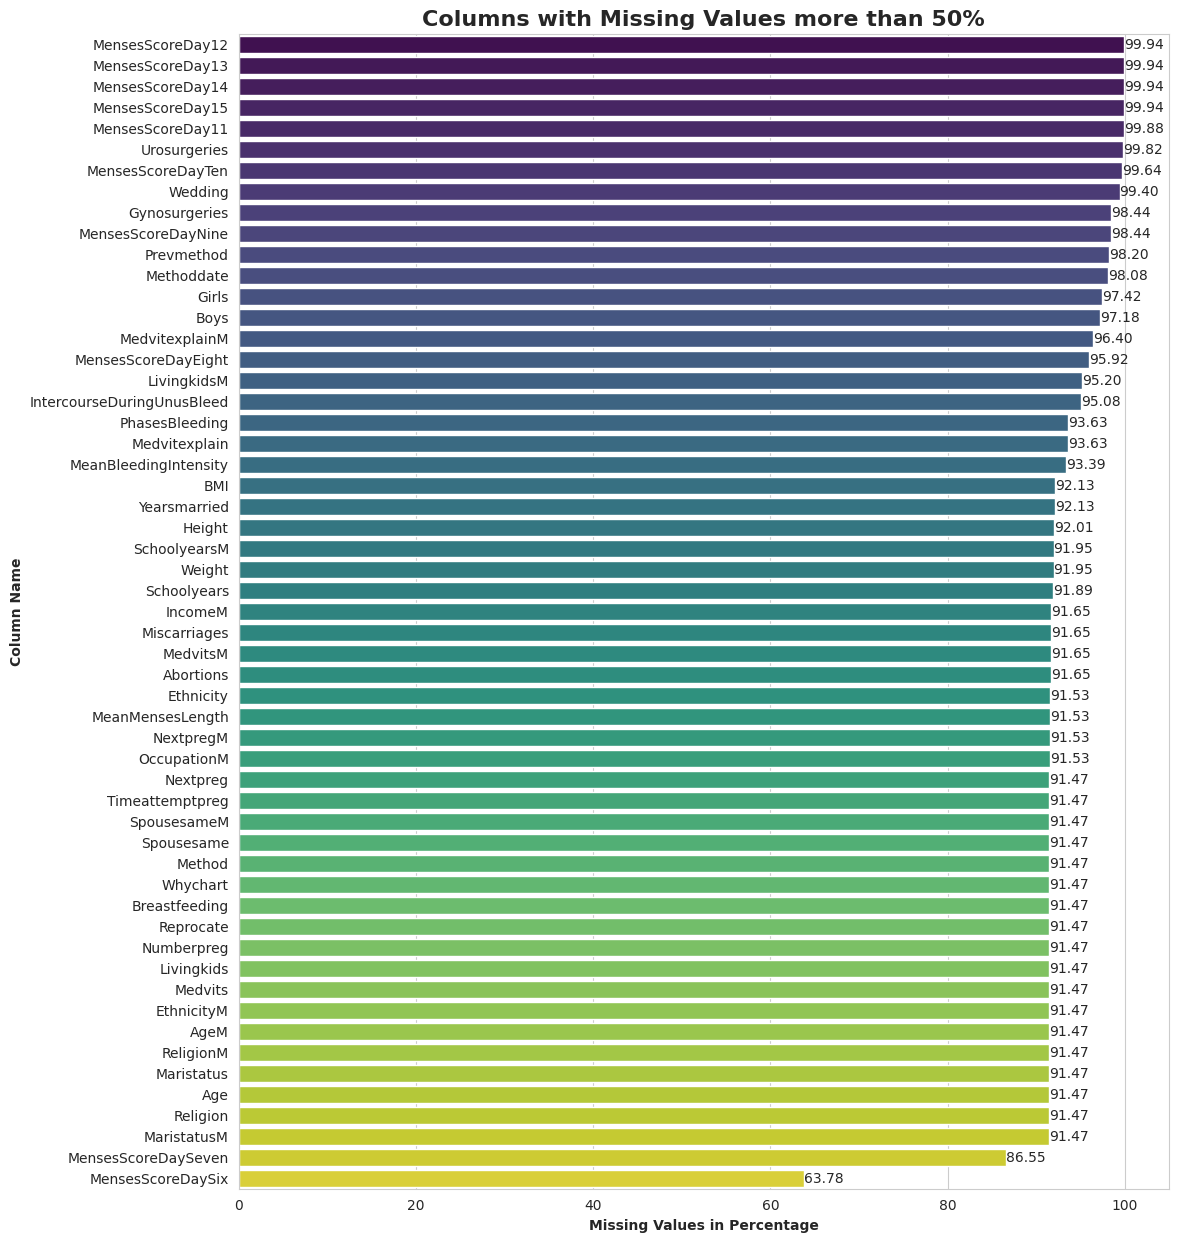

In [10]:

sns.set_style('whitegrid')
plt.figure(figsize=(12, 15))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values more than 50%',fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage',fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

<ipython-input-11-0f25525a702c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


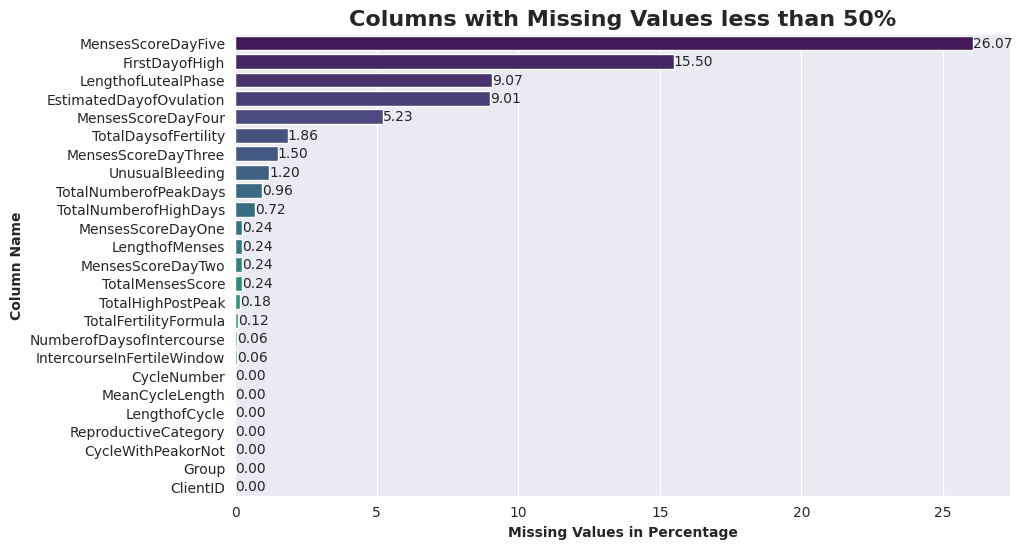

In [11]:

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values less than 50%', fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage', fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

Removing Columns that have more than 50% of missing values

In [12]:
df.columns

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

In [13]:
remove_cols = null_values[null_values["Missing Values in Percentage"] >= 50]["Column Name"].tolist()
df = df.drop(columns=remove_cols)

In [14]:
df = df.drop(columns="ClientID")

In [15]:
df.columns

Index(['CycleNumber', 'Group', 'CycleWithPeakorNot', 'ReproductiveCategory',
       'LengthofCycle', 'MeanCycleLength', 'EstimatedDayofOvulation',
       'LengthofLutealPhase', 'FirstDayofHigh', 'TotalNumberofHighDays',
       'TotalHighPostPeak', 'TotalNumberofPeakDays', 'TotalDaysofFertility',
       'TotalFertilityFormula', 'LengthofMenses', 'MensesScoreDayOne',
       'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour',
       'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse',
       'IntercourseInFertileWindow', 'UnusualBleeding'],
      dtype='object')

In [16]:
df.dtypes

CycleNumber                     int64
Group                           int64
CycleWithPeakorNot              int64
ReproductiveCategory            int64
LengthofCycle                   int64
MeanCycleLength               float64
EstimatedDayofOvulation        object
LengthofLutealPhase            object
FirstDayofHigh                 object
TotalNumberofHighDays          object
TotalHighPostPeak              object
TotalNumberofPeakDays          object
TotalDaysofFertility           object
TotalFertilityFormula          object
LengthofMenses                 object
MensesScoreDayOne              object
MensesScoreDayTwo              object
MensesScoreDayThree            object
MensesScoreDayFour             object
MensesScoreDayFive             object
TotalMensesScore               object
NumberofDaysofIntercourse      object
IntercourseInFertileWindow     object
UnusualBleeding                object
dtype: object

In [17]:
categ_col= df.select_dtypes(include= object).columns
num_col= df.select_dtypes(include= np.number).columns
categ_col
num_col

Index(['CycleNumber', 'Group', 'CycleWithPeakorNot', 'ReproductiveCategory',
       'LengthofCycle', 'MeanCycleLength'],
      dtype='object')

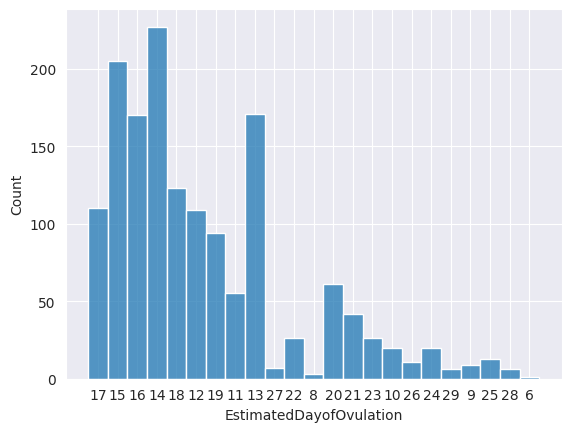

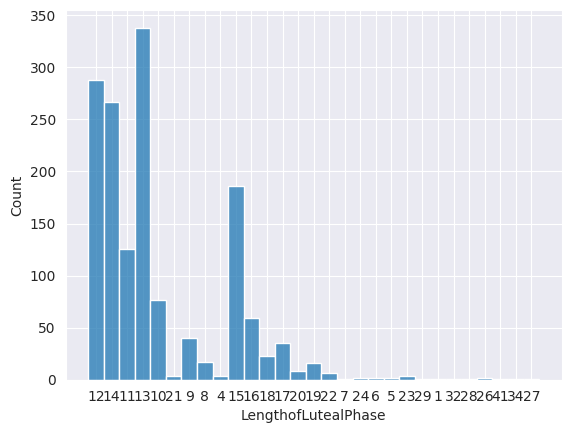

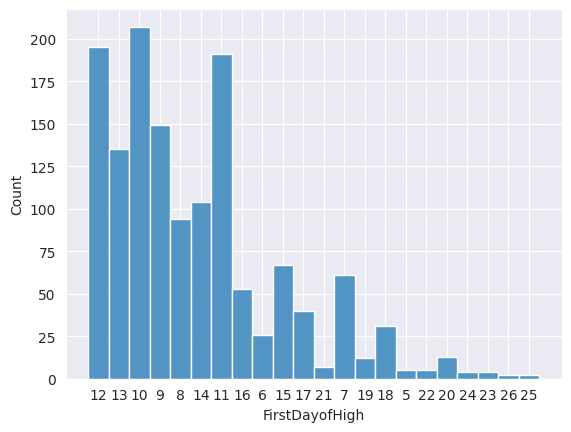

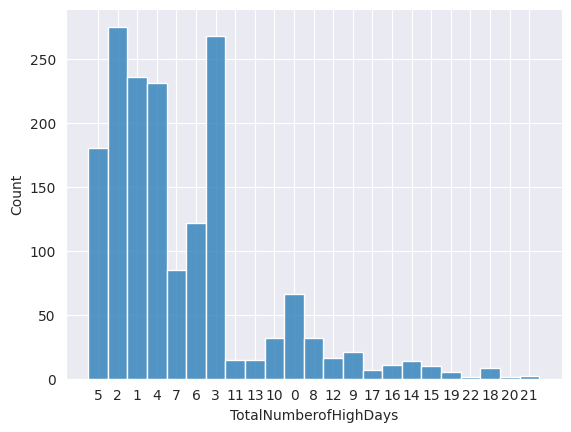

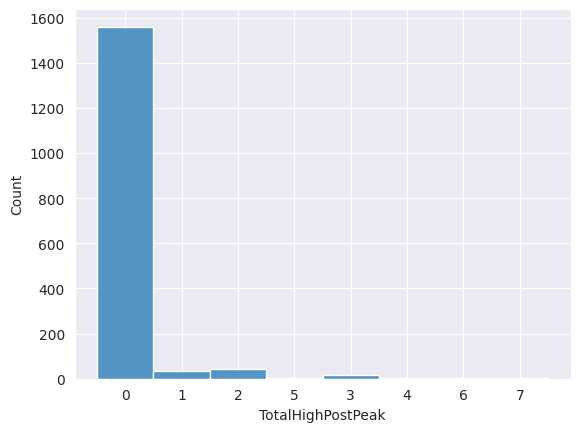

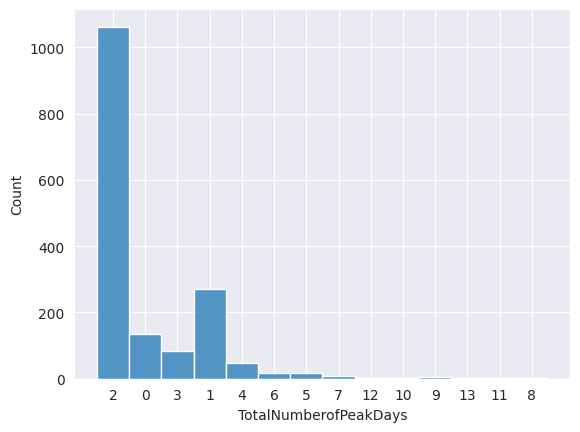

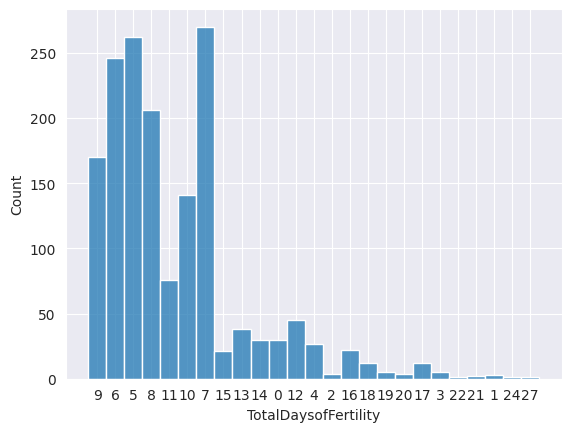

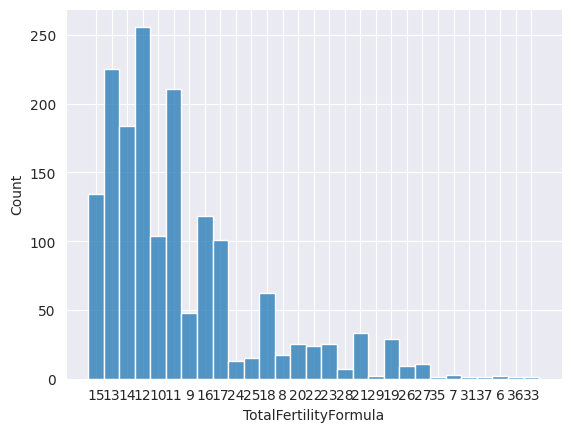

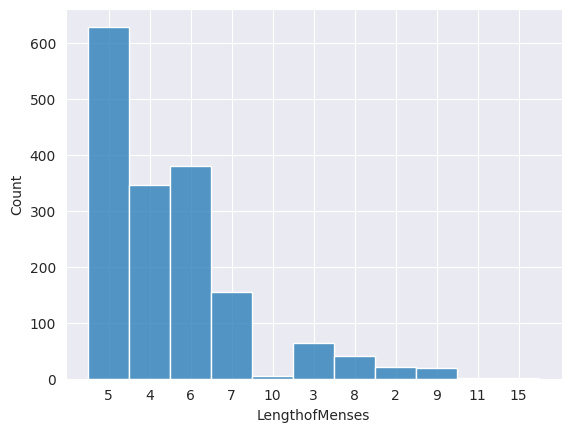

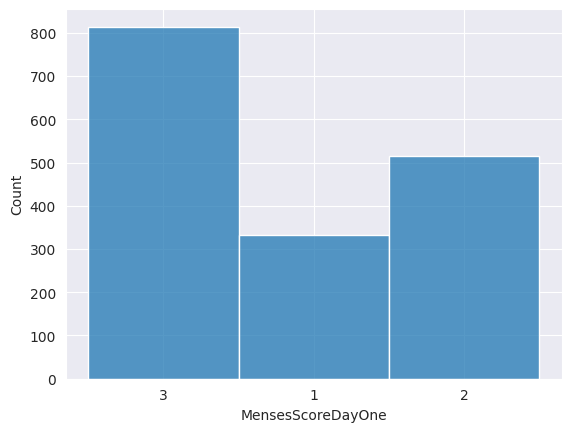

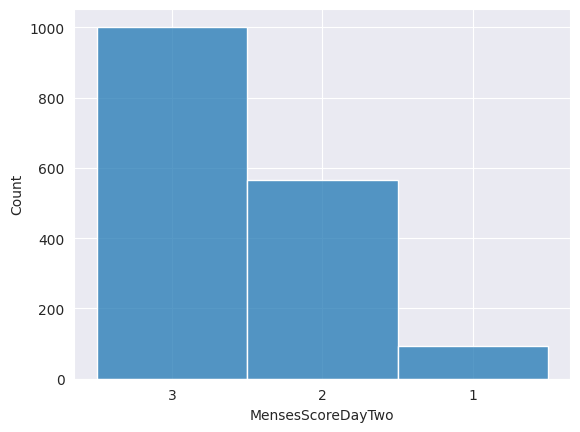

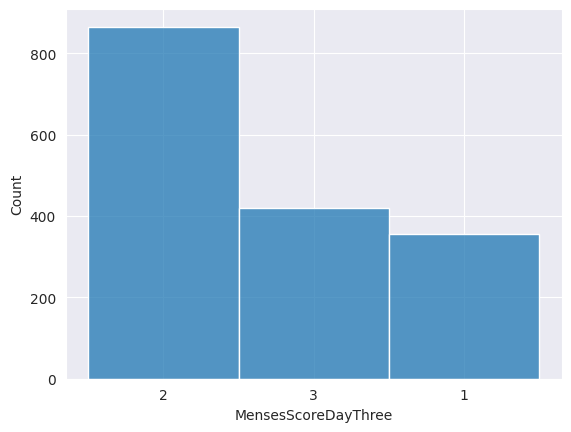

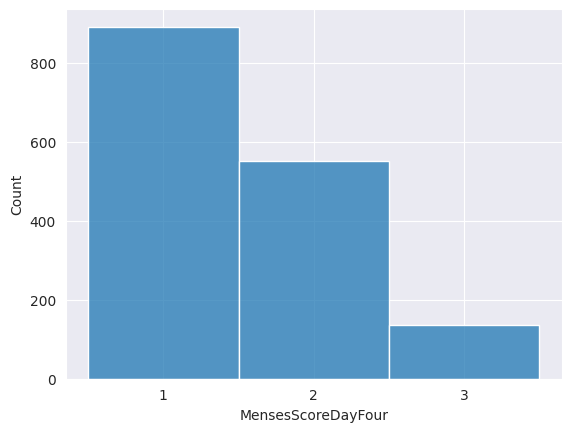

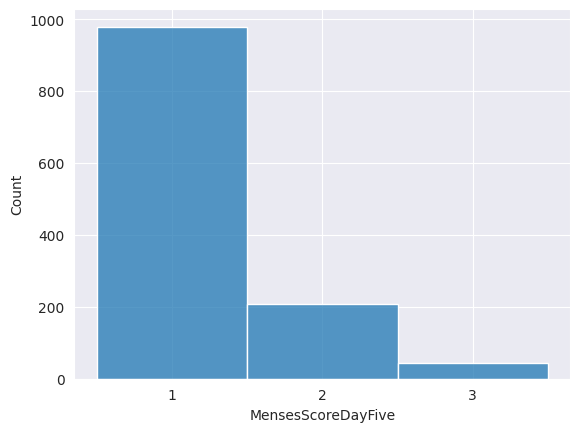

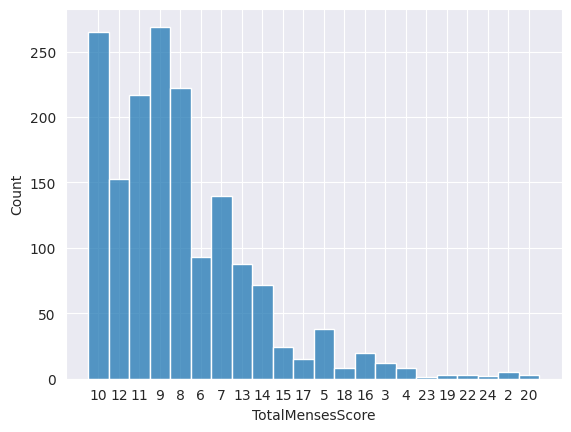

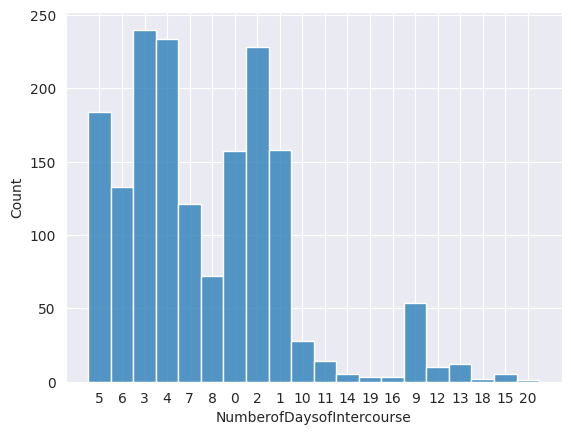

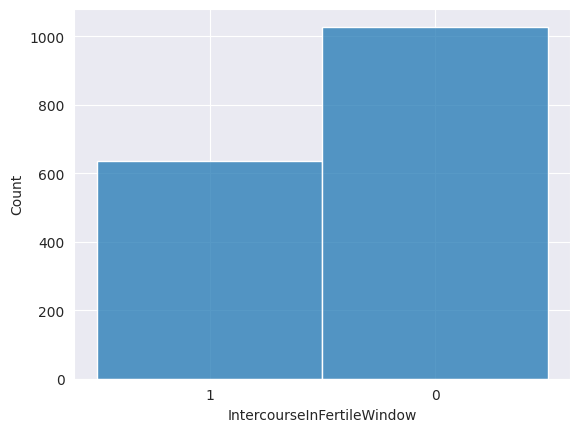

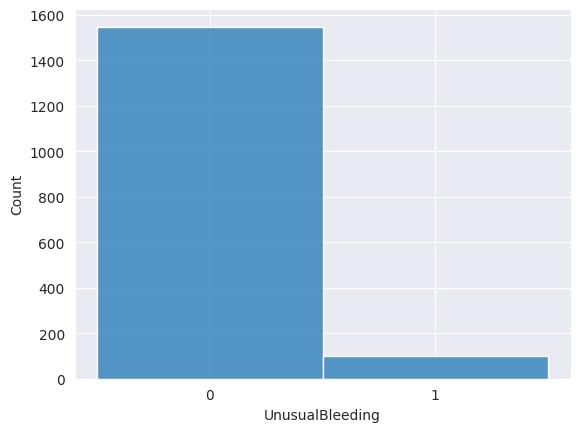

In [18]:
for i in categ_col:
    sns.histplot(data=df, x=i)
    plt.show()


Pre-processing categorical data by converting into numerica representation


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for i in categ_col:
    df[i] = pd.to_numeric(df[i])
    df[i]= encoder.fit_transform(df[i])

Replacing missing values with average values of the remaining data in the column

In [20]:
for i in df.columns:
  if (df[i].isnull().sum())> 100:
    df[i] = df[i].fillna(df[i].mean())

In [21]:
df

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,27.33,10,9,7,5,...,3,2,2,1,0,0,8,5,1,0
1,2,0,1,0,27,27.33,8,9,8,2,...,3,2,2,1,0,0,8,6,1,0
2,3,0,1,0,29,27.33,8,11,22,1,...,3,2,2,1,0,0,8,5,1,0
3,4,0,1,0,27,27.33,8,9,8,2,...,3,2,2,2,1,0,10,3,0,0
4,5,0,1,0,28,27.33,9,9,7,4,...,3,2,2,1,1,0,9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,29.64,12,7,8,5,...,6,1,2,2,1,1,13,8,0,1
1661,8,1,1,0,28,29.64,10,8,7,3,...,4,2,2,1,0,0,9,11,1,0
1662,9,1,1,0,28,29.64,9,9,6,4,...,3,2,1,1,0,0,7,7,0,0
1663,10,1,1,1,40,29.64,20,10,8,13,...,4,1,2,2,1,0,10,3,0,0


In [22]:
df.isnull().sum()

CycleNumber                   0
Group                         0
CycleWithPeakorNot            0
ReproductiveCategory          0
LengthofCycle                 0
MeanCycleLength               0
EstimatedDayofOvulation       0
LengthofLutealPhase           0
FirstDayofHigh                0
TotalNumberofHighDays         0
TotalHighPostPeak             0
TotalNumberofPeakDays         0
TotalDaysofFertility          0
TotalFertilityFormula         0
LengthofMenses                0
MensesScoreDayOne             0
MensesScoreDayTwo             0
MensesScoreDayThree           0
MensesScoreDayFour            0
MensesScoreDayFive            0
TotalMensesScore              0
NumberofDaysofIntercourse     0
IntercourseInFertileWindow    0
UnusualBleeding               0
dtype: int64

In [23]:
df.drop_duplicates()

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,27.33,10,9,7,5,...,3,2,2,1,0,0,8,5,1,0
1,2,0,1,0,27,27.33,8,9,8,2,...,3,2,2,1,0,0,8,6,1,0
2,3,0,1,0,29,27.33,8,11,22,1,...,3,2,2,1,0,0,8,5,1,0
3,4,0,1,0,27,27.33,8,9,8,2,...,3,2,2,2,1,0,10,3,0,0
4,5,0,1,0,28,27.33,9,9,7,4,...,3,2,2,1,1,0,9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,29.64,12,7,8,5,...,6,1,2,2,1,1,13,8,0,1
1661,8,1,1,0,28,29.64,10,8,7,3,...,4,2,2,1,0,0,9,11,1,0
1662,9,1,1,0,28,29.64,9,9,6,4,...,3,2,1,1,0,0,7,7,0,0
1663,10,1,1,1,40,29.64,20,10,8,13,...,4,1,2,2,1,0,10,3,0,0


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CycleNumber,1665.0,8.040841,6.593686,1.0,3.0,7.00,11.0,45.0
Group,1665.0,0.382583,0.486164,0.0,0.0,0.00,1.0,1.0
CycleWithPeakorNot,1665.0,0.912312,0.282925,0.0,1.0,1.00,1.0,1.0
ReproductiveCategory,1665.0,0.055255,0.479706,0.0,0.0,0.00,0.0,9.0
LengthofCycle,1665.0,29.299099,3.887932,18.0,27.0,29.00,31.0,54.0
MeanCycleLength,1665.0,29.297015,2.828434,24.0,27.0,28.77,31.0,40.0
EstimatedDayofOvulation,1665.0,10.228228,5.254078,0.0,7.0,9.00,12.0,23.0
LengthofLutealPhase,1665.0,11.957357,5.911200,0.0,9.0,10.00,12.0,29.0
FirstDayofHigh,1665.0,9.123123,6.274460,0.0,5.0,7.00,11.0,22.0
TotalNumberofHighDays,1665.0,4.383183,3.833958,0.0,2.0,3.00,5.0,23.0


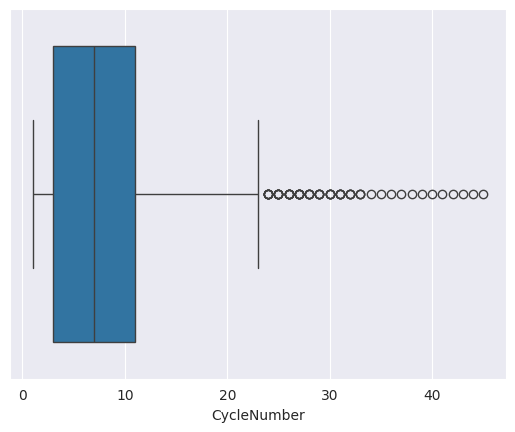

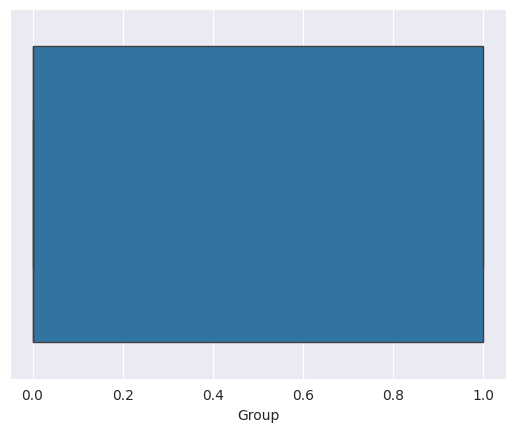

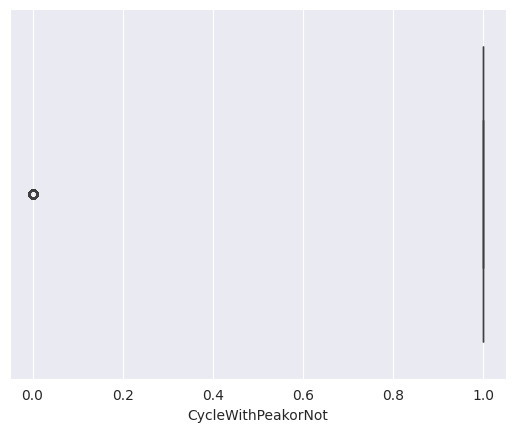

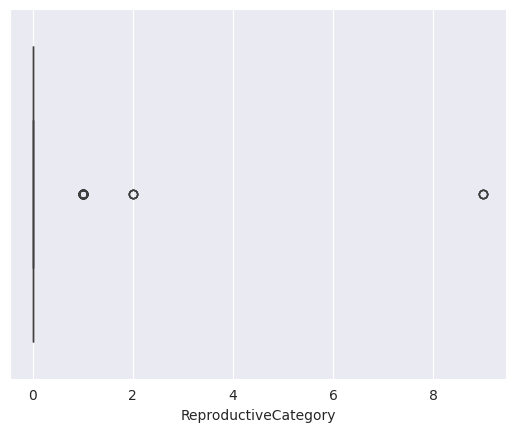

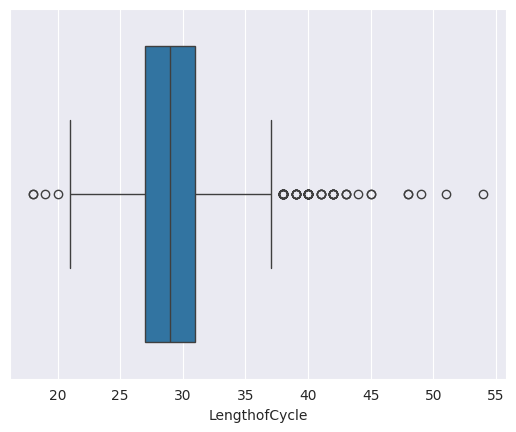

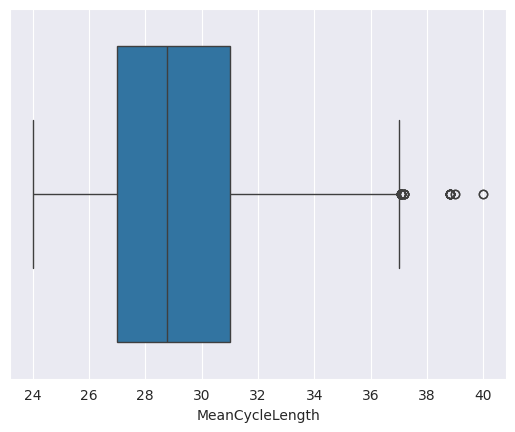

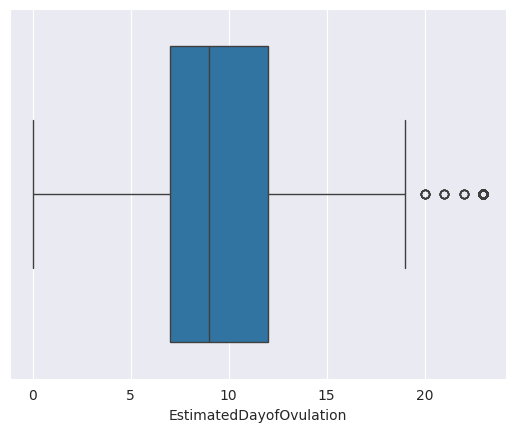

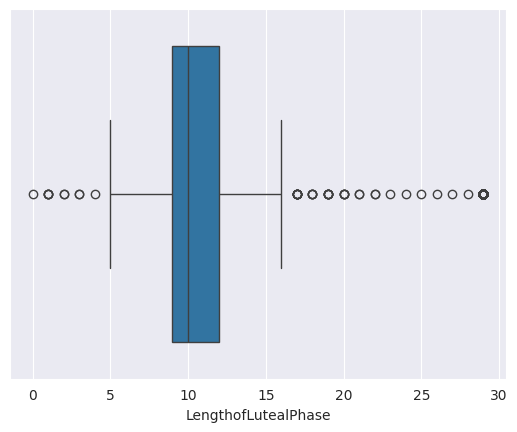

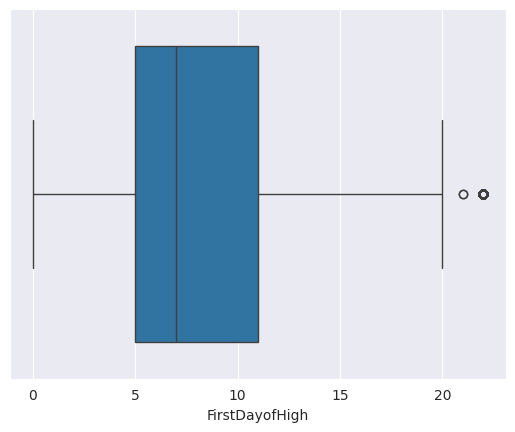

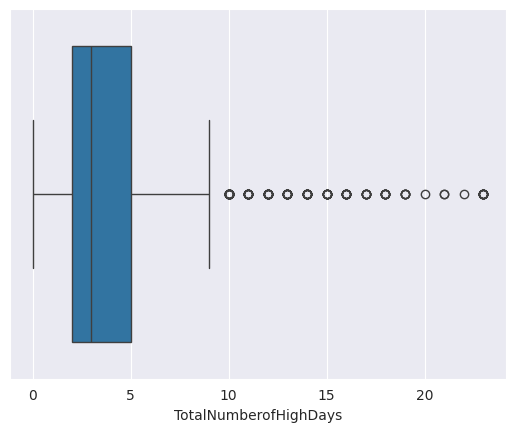

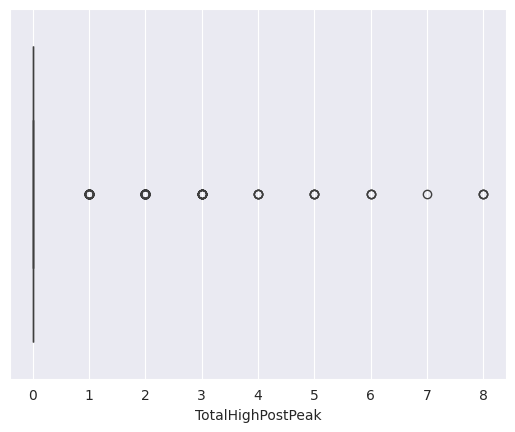

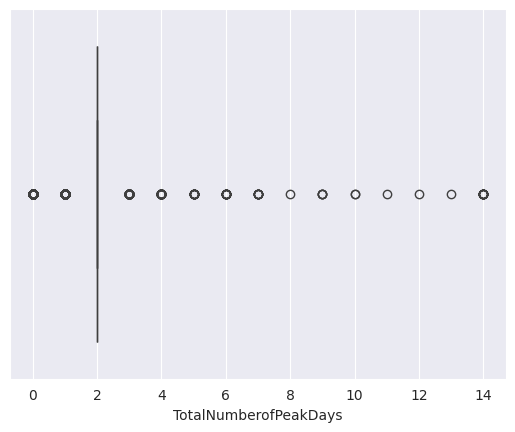

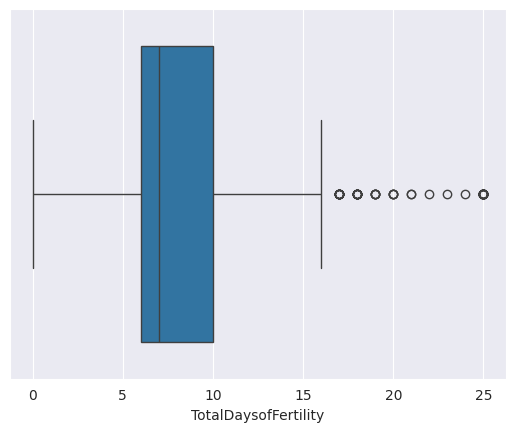

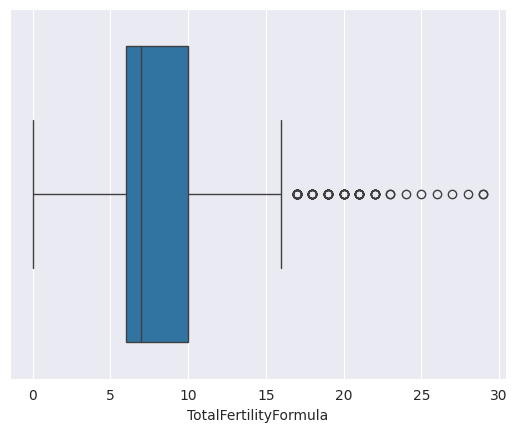

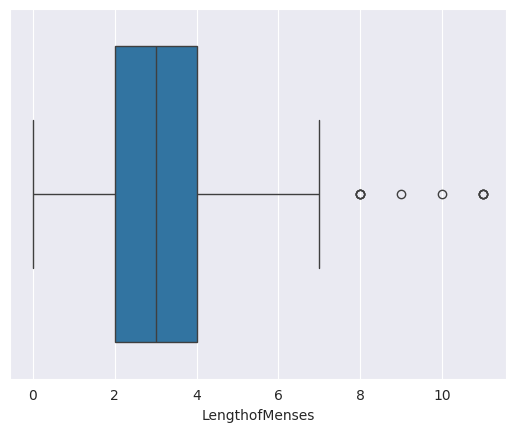

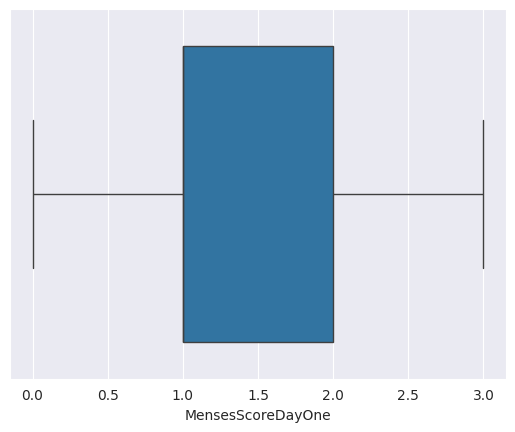

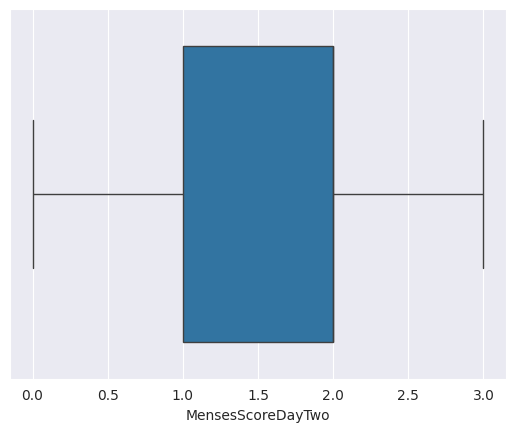

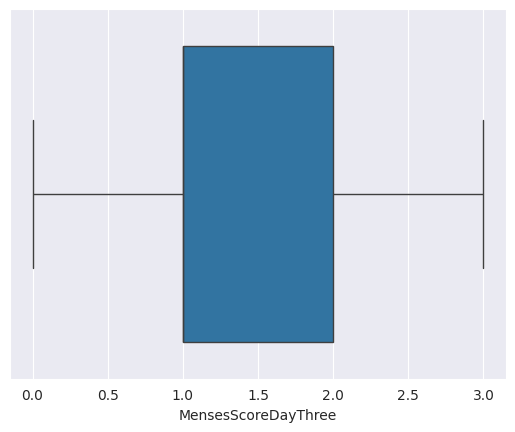

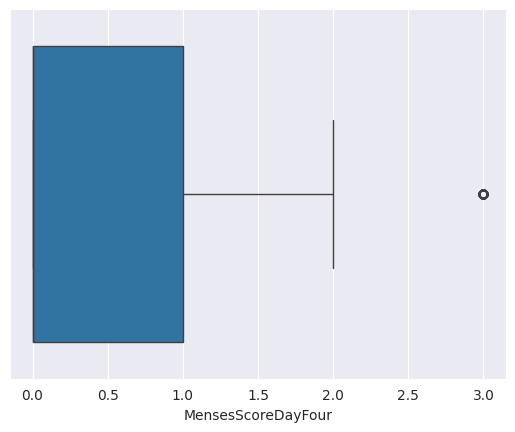

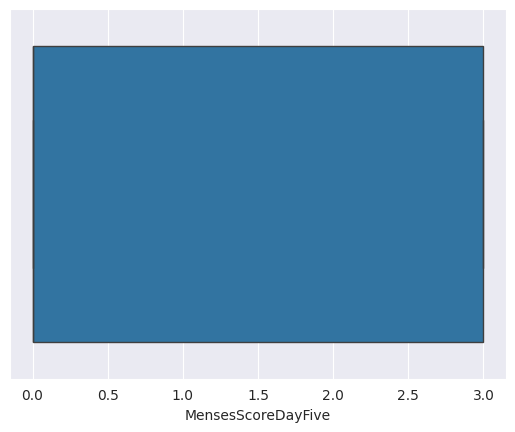

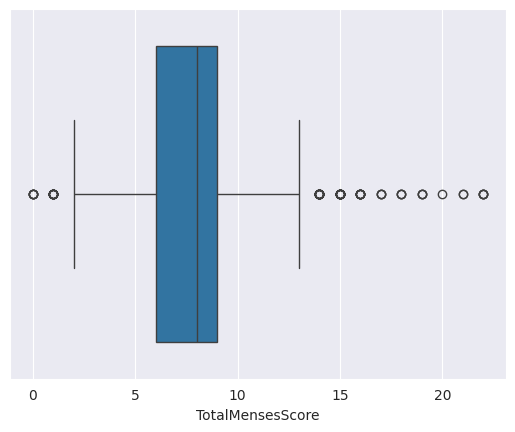

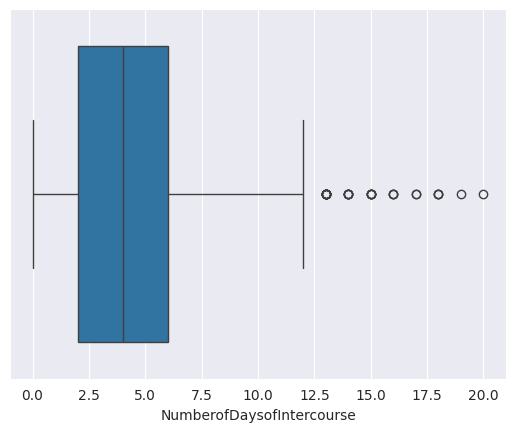

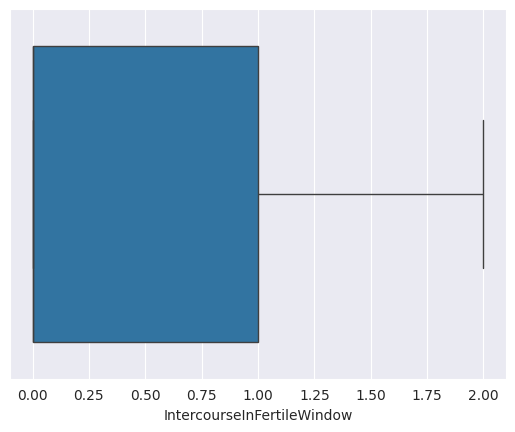

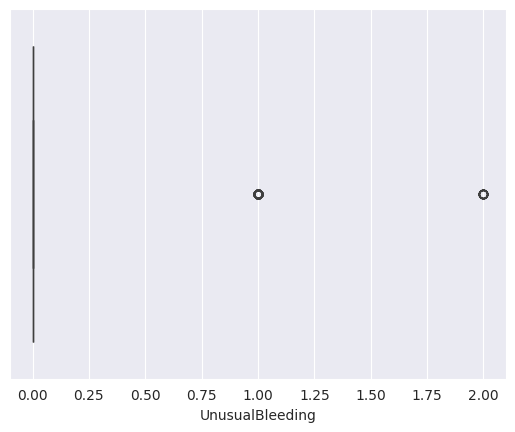

In [25]:
for i in df.columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [26]:
outliers_percentages = []

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_percentage = (outliers_count / len(df[col])) * 100

    outliers_percentages.append({'Column': col, 'Outlier Percentage': outliers_percentage})

outliers_df = pd.DataFrame(outliers_percentages)
outliers_df = outliers_df.sort_values(by='Outlier Percentage', ascending=False)

<ipython-input-27-9d7ef8f91474>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= outliers_df , x="Outlier Percentage", y= "Column" , palette="viridis")


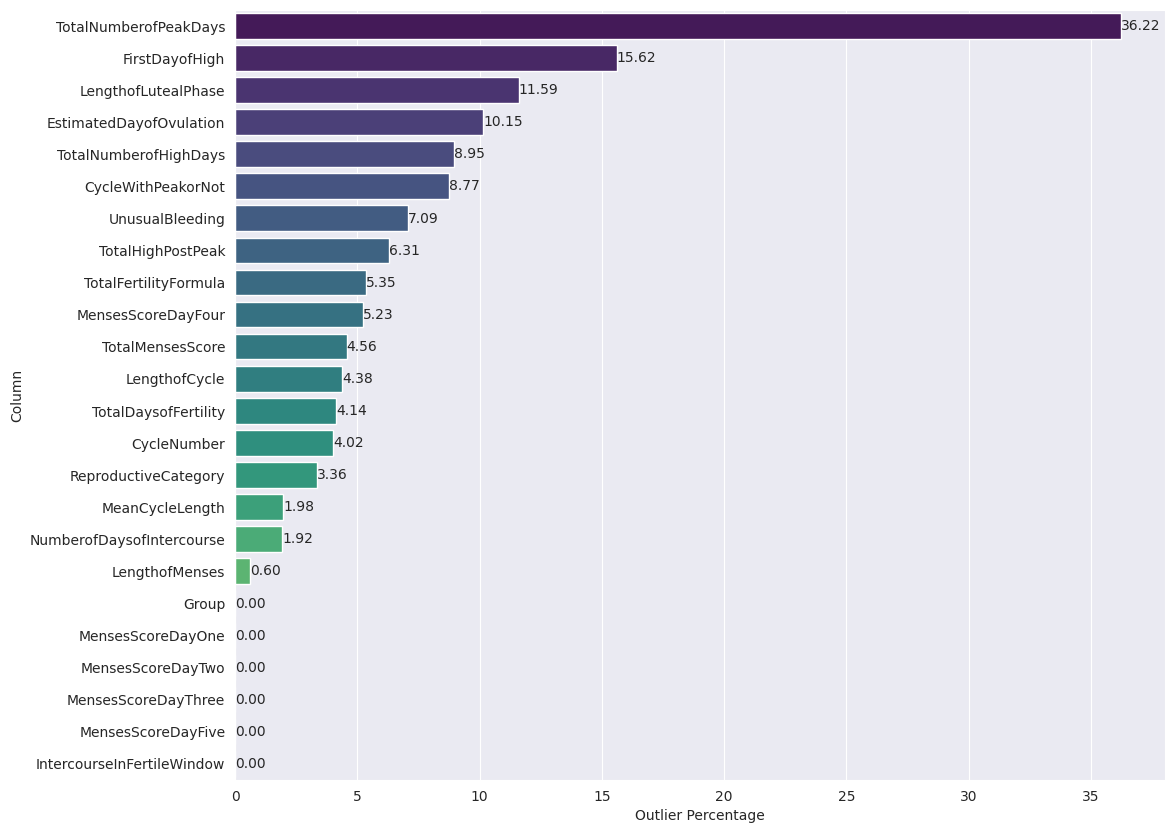

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
ax = sns.barplot(data= outliers_df , x="Outlier Percentage", y= "Column" , palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

In [28]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Calculate outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_percentage = outliers.mean() * 100


    df[col] = df[col].where(~outliers, np.mean(df[col]))


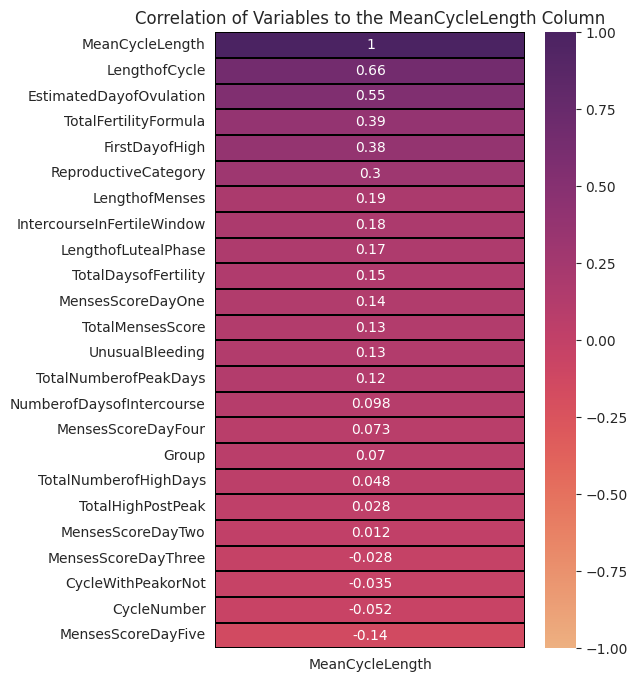

In [29]:
plt.figure(figsize=(5,8))
sns.heatmap(df.corr()['MeanCycleLength'].sort_values(ascending=False).to_frame(),
            annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black', cmap= 'flare')
plt.title('Correlation of Variables to the MeanCycleLength Column')
plt.show()

# Feature Selection: Removing irrelevant columns and checking if it improves the mse.

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize data
scaler = MinMaxScaler()
df['LengthofCycle'] = scaler.fit_transform(df['LengthofCycle'].values.reshape(-1, 1))

# Create sequences (example with sequence length of 3)
sequences = []
for i in range(3, len(df)):
    sequences.append(df['LengthofCycle'].iloc[i-3:i].values)
X = np.array(sequences)
y = df['LengthofCycle'].iloc[3:].values

# Split data
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16)

# Predict
y_pred = model.predict(X_test)

# Inverse transform predictions
y_pred = scaler.inverse_transform(y_pred)

# Evaluate (example with Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

Epoch 1/50
84/84 [==============================] - 4s 10ms/step - loss: 0.0821
Epoch 2/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0267
Epoch 3/50
84/84 [==============================] - 1s 9ms/step - loss: 0.0264
Epoch 4/50
84/84 [==============================] - 1s 9ms/step - loss: 0.0264
Epoch 5/50
84/84 [==============================] - 1s 12ms/step - loss: 0.0263
Epoch 6/50
84/84 [==============================] - 1s 8ms/step - loss: 0.0265
Epoch 7/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 8/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 9/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 10/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 11/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 12/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 13/50
84/84 [===========================

In [31]:
df.columns

Index(['CycleNumber', 'Group', 'CycleWithPeakorNot', 'ReproductiveCategory',
       'LengthofCycle', 'MeanCycleLength', 'EstimatedDayofOvulation',
       'LengthofLutealPhase', 'FirstDayofHigh', 'TotalNumberofHighDays',
       'TotalHighPostPeak', 'TotalNumberofPeakDays', 'TotalDaysofFertility',
       'TotalFertilityFormula', 'LengthofMenses', 'MensesScoreDayOne',
       'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour',
       'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse',
       'IntercourseInFertileWindow', 'UnusualBleeding'],
      dtype='object')

In [32]:
df = df.drop(columns=['MensesScoreDayThree', 'MensesScoreDayFour', 'Group','MensesScoreDayFive','MensesScoreDayOne','MensesScoreDayTwo', 'TotalMensesScore', 'NumberofDaysofIntercourse',
       'IntercourseInFertileWindow', 'UnusualBleeding','TotalFertilityFormula', 'LengthofMenses', 'FirstDayofHigh', 'TotalNumberofHighDays',
       'TotalHighPostPeak', 'TotalNumberofPeakDays', 'CycleWithPeakorNot', 'CycleNumber'])

In [33]:
df.columns

Index(['ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'TotalDaysofFertility'],
      dtype='object')

Random forest regressor with gradient boost

In [34]:

# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y = df['MeanCycleLength']
x = df.drop('MeanCycleLength', axis=1)

# Split data into train and test sets (assuming you haven't already)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(x_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(x_test)


# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(x_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting.predict(x_test)

# Evaluate Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("\nGradient Boosting:")
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)

Random Forest:
MSE: 3.6929441080509715
RMSE: 1.9217034391526107
MAE: 1.477731769515802

Gradient Boosting:
MSE: 3.064143215721905
RMSE: 1.7504694272457044
MAE: 1.3472319488551778


MSE really sucks :(

In [35]:
# neural network model
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

y = df['MeanCycleLength']
x = df.drop('MeanCycleLength', axis=1)

# Get the number of columns
num_features = x.shape[1]

# the model
model = keras.Sequential([
    # Input layer (layers.Dense) with 64 neurons, ReLU activation, and L1 regularization (to prevent overfitting).
    layers.Dense(64, activation='relu', input_shape=(num_features,), kernel_regularizer=tf.keras.regularizers.l1(0.02)),
    # Two hidden layers (layers.Dense) with 32 and 16 neurons respectively, both using ReLU activation.
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Adam optimizer with a learning rate that exponentially decays
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.02,
    decay_steps=10000,
    decay_rate=0.9)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mse')

# Split data into train and test sets (x and y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model. This is how the model learns by mapping input column to output columns.
model.fit(x_train, y_train, epochs=100, batch_size=32)

# trained model is evaluated on the test data to compute the loss
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)

# Make predictions (y_pred) on the test set (x_test)
y_pred = model.predict(x_test)

y_pred = model.predict(x_test)
print("Predicted cycle lengths:", y_pred)



# Assuming 'y_test' are the true target values for the test set and 'y_pred' are the model's predictions on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)



Epoch 1/100
42/42 [==============================] - 1s 2ms/step - loss: 68.2766
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 10.9174
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 10.2575
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 11.3199
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 9.3738
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 7.3669
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 6.5913
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 5.5190
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 5.1511
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 7.7507
Epoch 11/100
42/42 [==============================] - 0s 2ms/step - loss: 5.6052
Epoch 12/100
42/42 [==============================] - 0s 2ms/step - loss: 5.2572
Epoch 13/100
42/42 [=============

Even after adding an exponential decay o gradually reduce the learning rate during training, the model didn't converge faster to a good solution. It became worse.

Let's try to remove/ filter some columns that we don't need for menstrual cycle length prediction.

Here is a correlation matrix to determine the columns with negative correlation with mean cycle length.

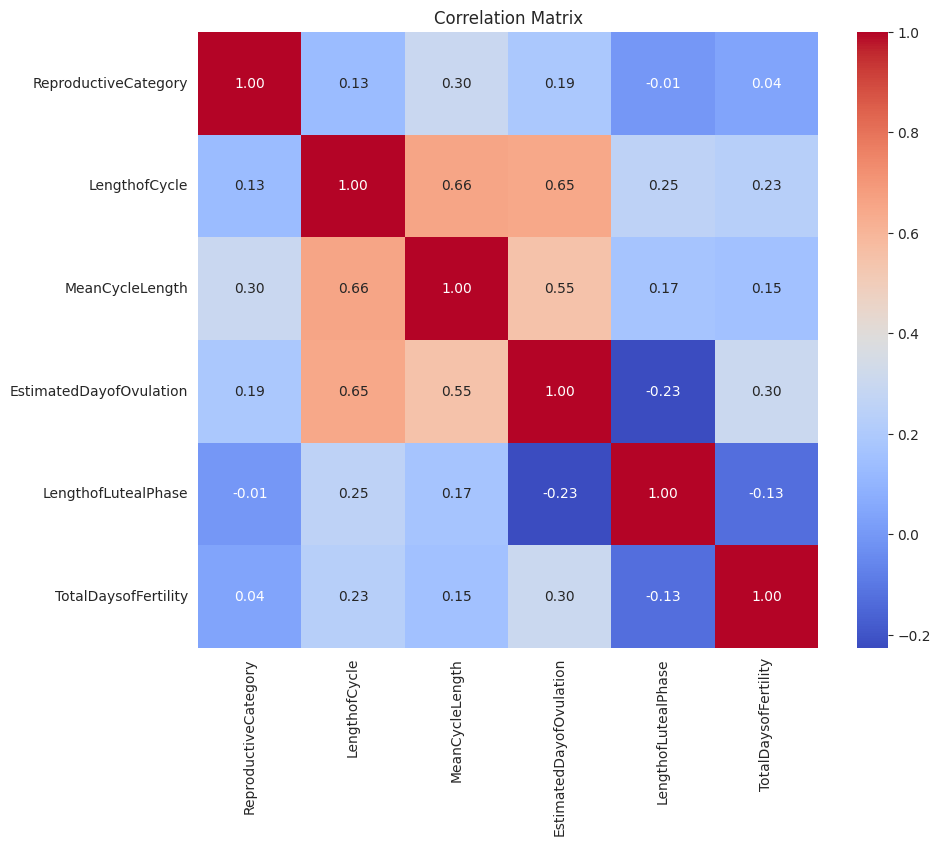

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

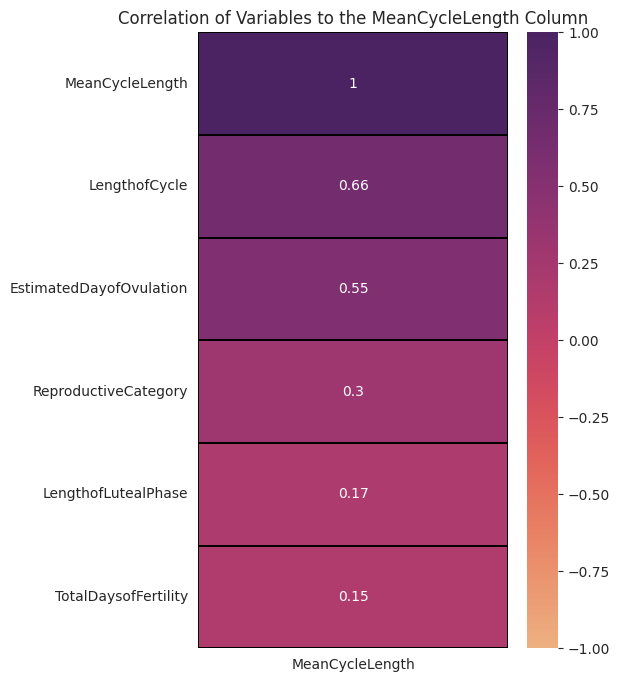

In [37]:
plt.figure(figsize=(5,8))
sns.heatmap(df.corr()['MeanCycleLength'].sort_values(ascending=False).to_frame(),
            annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black', cmap= 'flare')
plt.title('Correlation of Variables to the MeanCycleLength Column')
plt.show()

In [38]:
y = df['MeanCycleLength']
x = df.drop('MeanCycleLength', axis=1)


In [39]:
df['MeanCycleLength']

0       27.33
1       27.33
2       27.33
3       27.33
4       27.33
        ...  
1660    29.64
1661    29.64
1662    29.64
1663    29.64
1664    29.64
Name: MeanCycleLength, Length: 1665, dtype: float64

# Again training the new filtered dataset
This time trying something new - Early Stopping. This is a callback applied to monitor validation loss and stop the training early f no improvement is observed (after 10 epochs patience= 10). restore_best_weights=True ensures the model returns to the best weights observed during training.

In [40]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Define the model architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_features,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mean_squared_error')

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model using the test set
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)

# Make predictions
y_pred = model.predict(x_test)
print("Predicted cycle lengths:", y_pred)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 737.2614 - val_loss: 523.0503
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 228.8846 - val_loss: 83.1365
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 72.5986 - val_loss: 54.3554
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 56.8116 - val_loss: 39.6059
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 44.9491 - val_loss: 29.1667
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 33.5215 - val_loss: 22.0409
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 27.4603 - val_loss: 15.5412
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 22.2773 - val_loss: 11.1861
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 19.2025 - val_loss: 8.8297
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 16.8433 - val_l

In [42]:
df.columns

Index(['ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'TotalDaysofFertility'],
      dtype='object')

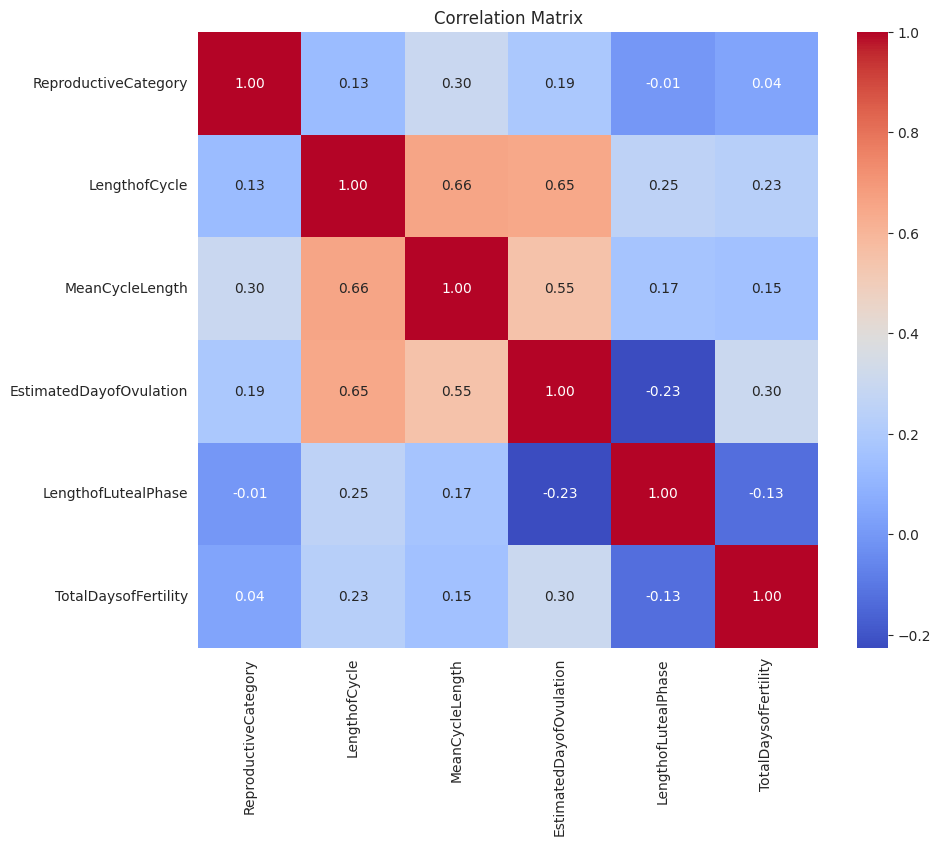

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [47]:


# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model
random_forest.fit(x_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(x_test)


# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(n_estimators=1000, random_state=11)

# Train the model
gradient_boosting.fit(x_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting.predict(x_test)

# Evaluate Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("\nGradient Boosting:")
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)

Random Forest:
MSE: 3.666598093550407
RMSE: 1.9148363098579488
MAE: 1.4712102015220532

Gradient Boosting:
MSE: 3.477725544272195
RMSE: 1.864866092852834
MAE: 1.4332511781025834


# **How can I improve the accuracy ?** (Brainstorming) 🤔
1. Adding more layers to my neural network.
2. More feature engineering.
3. Combine with more datasets.
4. Hyperparameter tuning - grid search (a grid of hyperparameter values that you want to evaluate and train model for each combination of hyperparameters defined in the grid, select the best set of hyperparameters.), Random Search.
5. Implementing an RNN will improve the prediction model. Since each client recorded multiple cycles of their own, we can do a time series analysis of each client and then see if this increases the accuracy(Difficult right now but still doable)
